# Классификация длительности байкшеринг поездок и анализ пользовательского поведения
***
## Данные: источник и описание
https://www.kaggle.com/cityofLA/los-angeles-metro-bike-share-trip-data#metro-bike-share-trip-data.csv 

Данные о поездках на прокатных велосипедах (байкшеринг, metro bike share) в городе Лос Анджелес с Июля 2016 по Март 2017, включают данные:

* Дата и время начала и окончания поездки 
* Продолжительность поездки
* Координаты (широта, долгота) и номера начальной и конечной остановок 
* Номер велосипедов (Bike ID)
* Тип поездки: в одну сторону или круговой
* Тип проездного (разовый, месячный, годовой)

## Цели

Научиться оценивать длительность поездки до его начала, классифицировать по группам (0-10, 10-20, 20-30, >30 минут), что будет полезным для планирования расписания. А также проанализировать поведения клиентов сервиса, факторы, влияющие на продолжительность поездки и их количество.
## План решения

1. Редактирование данных: форматирование даты, удаление ненужных и добавление нужных колонок
2. Разбиение выборки на тренировочную и тестовую, применение классификаторов, выбор классификатора с лучшей точностью
3. Интерпретация результатов, определение значимости переменных
4. Подробный анализ наиболее значимых переменных

# Решение

Загружаем библиотеки и данные, форматируем дату на "месяц", "день", "время", добавляем новые переменные (dLat - изменение долготы, dLon -изменение широты, dAbs - евклидово расстояние)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
dat = pd.read_csv("metro-bike-share-trip-data.csv", sep = ',', error_bad_lines=False, index_col=False, dtype='unicode')
dat1 = dat.copy()
dat0 = dat.copy()
dat["Start Time"]=pd.to_datetime(dat["Start Time"])
#dat["End Time"]=pd.to_datetime(dat["End Time"])
#dat["year"]=dat["Start Time"].dt.year
dat["Month"]=dat["Start Time"].dt.month
dat["Day"]=dat["Start Time"].dt.day
#dat["hour"]=dat["Start Time"].dt.hour
#dat["minute"]=dat["Start Time"].dt.minute
dat["Time"]=dat["Start Time"].dt.hour+(dat["Start Time"].dt.minute/60)
dat["dLat"]=pd.to_numeric(dat["Ending Station Latitude"])-pd.to_numeric(dat["Starting Station Latitude"])
dat["dLon"]=pd.to_numeric(dat["Ending Station Longitude"])-pd.to_numeric(dat["Starting Station Longitude"])
dat["dAbs"]=np.sqrt(dat.dLat**2+dat.dLon**2)

Функция классифицирования длительности поездки

In [10]:
def cost(x):
    if x<600:
        return("0-10m")
    if x<1200:
        return("10-20m")
    if x<1800:
        return("20-30m")
    else: 
        return(">30m")

Форматирование колонок "проездной", "тип поездки", "длительность", удаление лишних переменных

In [11]:
dat["Passholder Type"]=dat["Passholder Type"].replace({"Monthly Pass": 2,"Walk-up": 1, "Flex Pass": 3, "Staff Annual": 4})
dat["Trip Route Category"]=dat["Trip Route Category"].replace({"Round Trip": 1, "One Way": 0})
dat["Duration"]=pd.to_numeric(dat["Duration"]).apply(cost)
dat=dat.drop(columns=["Trip ID", "Start Time","End Time", "Starting Station Latitude", "Starting Station Longitude", "Ending Station Latitude", "Ending Station Longitude", "Plan Duration", "Starting Lat-Long", "Ending Lat-Long"])
dat=dat.dropna()
dat

,Duration,Starting Station ID,Ending Station ID,Bike ID,Trip Route Category,Passholder Type,Month,Day,Time,dLat,dLon,dAbs
0,0-10m,3014,3014,6281,1,2,7,7,4.283333,0.000000,0.000000,0.000000
1,>30m,3014,3014,6281,1,2,7,7,6.000000,0.000000,0.000000,0.000000
2,0-10m,3016,3016,5861,1,3,7,7,10.533333,0.000000,0.000000,0.000000
3,>30m,3016,3016,5861,1,3,7,7,10.616667,0.000000,0.000000,0.000000
4,0-10m,3032,3032,6674,1,1,7,7,12.850000,0.000000,0.000000,0.000000
5,10-20m,3021,3054,6717,0,2,7,7,12.850000,-0.006390,0.000540,0.006412
6,10-20m,3022,3014,5721,0,2,7,7,12.900000,0.010540,-0.004120,0.011317
7,10-20m,3076,3005,5957,0,3,7,7,12.983333,0.007950,-0.005210,0.009505
8,>30m,3031,3031,6137,1,3,7,7,13.016667,0.000000,0.000000,0.000000
9,10-20m,3031,3078,6351,0,2,7,7,13.016667,0.019581,0.013500,0.023784


Разбиваем выборку на тренировочную и тестовую

In [12]:
Y = dat.iloc[:,0].values
X = dat.iloc[:,1:12].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

Из множества классификаторов для данной задачи (логистическая регрессия, логистическая регрессия с кросс-валидацией, дерево решений, вотинг на них, AdaBoostClassifier, GradientBoosting, случайный лес), лучшей точностью обладает последний. Поэтому в качестве итоговой выбираем алгоритм случайного леса.

In [13]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=100, max_features=5)
modelRF.fit(X_train, Y_train)
modelRF.score(X_train, Y_train), modelRF.score(X_test, Y_test)

(0.9999657342577469, 0.7224735014619883)

In [14]:
from sklearn.metrics import confusion_matrix
Y_pred = modelRF.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[17183  2141   106   418]
 [ 3243  9937   623   572]
 [  748  1475  1453   688]
 [  856   943   336  3054]]


Посмотрим на значимость переменных

In [15]:
feat=pd.Series(data=modelRF.feature_importances_, index=dat.columns[1:12])
feat

Starting Station ID    0.053402
Ending Station ID      0.053340
Bike ID                0.119273
Trip Route Category    0.017866
Passholder Type        0.084810
Month                  0.056990
Day                    0.097652
Time                   0.146579
dLat                   0.072475
dLon                   0.087003
dAbs                   0.210611
dtype: float64

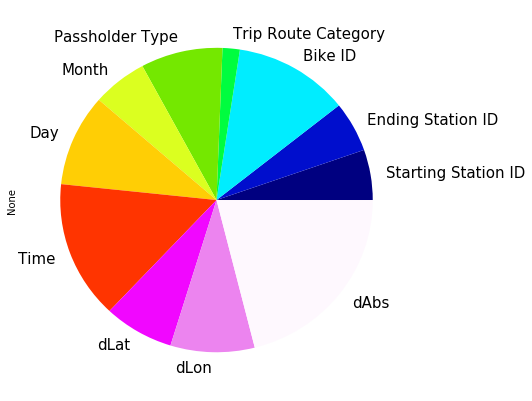

In [16]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
cs=cm.Set1(np.arange(9))
feat.plot(kind="pie", figsize=(7, 7), fontsize=15, cmap='gist_ncar');

***
# Интерпретация

Самыми значимыми переменными оказались: 

1. **Евклидово расстояние между начальным и конечным пунктами** 21.1%
2. **Время начала поездки** 14.7%
3. **Номер велосипеда** 12%
4. **День месяца** 9.8%


* Расстояние: несмотря на примитивность (ведь не рассчитывает "сферическое расстояние", топографию города) все же является наиболее весомым параметром. Чем дальше нам ехать, тем дольше мы будем кататься.
* Время суток: осмелюсь предположить, что утром/вечером в будние дни поездки короткие, так как люди используют велосипеды чтобы добраться/уйти до/c места работы/учебы. А если поездка начинается в середине дня, то, вероятно, у человека много свободного времени/выходной, что позволяет ему дольше кататься.
* Номер велосипеда: как не странно, но да, номер велосипеда. Думаю это связано с тем, что существует класс "популярных" велосипедов используемых в наиболее людных местах (центр района/города) и для наиболее популярных маршрутов. Такие велосипеды редко используются для продолжительных поездок, ведь в центре города станции расположены плотнее, а с не "популярными" велосипедами все наоборот: они редко используются, но для более продолжительных поездок по отдаленным от центра маршрутам.
* День: думаю вполне очевидно, что на выходных у большинства людей больше времени на продолжительные поездки нежели в будние.

# Анализ переменных

### **1. Расстояние**

Может показаться, что данный параметр должен оказывать большее влияние на длительность поездки, что здесь просматривается линейная зависимость между ними, но на графике видно, что зависимоcть нелинейна (график в минутах).

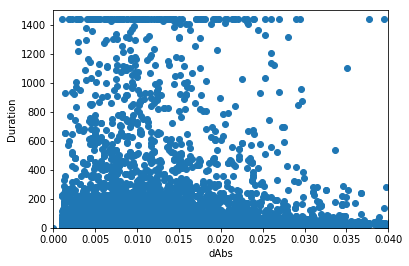

In [9]:
#dat0 = pd.read_csv("metro-bike-share-trip-data.csv", sep = ',', error_bad_lines=False, index_col=False, dtype='unicode')
dat1=dat1[dat1["Trip Route Category"]=="One Way"]
dat1["Duration"]=pd.to_numeric(dat1["Duration"])/60
dat1["dLat"]=pd.to_numeric(dat1["Ending Station Latitude"])-pd.to_numeric(dat1["Starting Station Latitude"])
dat1["dLon"]=pd.to_numeric(dat1["Ending Station Longitude"])-pd.to_numeric(dat1["Starting Station Longitude"])
dat1["dAbs"]=np.sqrt(dat1.dLat**2+dat1.dLon**2)
plt.axis([0,0.04,0,1500])
plt.xlabel("dAbs")
plt.ylabel("Duration")
plt.scatter(dat1["dAbs"],dat1["Duration"])

Можно сослаться на неточность приближения функционала расстояния. По этому поводу скажу:
* На коротких расстояниях евклидово приближение допустимо и достаточно точно
* На длинных дистанциях (>60 минут) маловероятно, что обычный пользователь велосипеда будет перемещаться с постоянной скоростью и без остановок.

Другие причины нелинейности зависимости:
* Для круговых маршрутов расстояние равно 0 и не может влиять на продолжительность поездки
* Загруженность трафика и другие параметры влияют на скорость, а значит и на длительность поездки
* Люди иногда выбирают не кратчайшие маршруты (выходная поездка, туризм...).
***

### **2. Время**

Рассмотрим численные характеристики времени начала аренды велосипеда в зависимости от типа поездки:

In [10]:
#dat0 = pd.read_csv("metro-bike-share-trip-data.csv", sep = ',', error_bad_lines=False, index_col=False, dtype='unicode')
dat0["Hour"]=pd.to_datetime(dat0["Start Time"]).dt.hour
dat0["Month"]=pd.to_datetime(dat0["Start Time"]).dt.month
dat0["Day"]=pd.to_datetime(dat0["Start Time"]).dt.day
dat0["Month"]=dat0["Month"].replace({1: 13, 2: 14, 3: 15})
dat0["Duration"]=pd.to_numeric(dat0["Duration"])/60
dat0["Starting Station Latitude"]=pd.to_numeric(dat0["Starting Station Latitude"])
dat0["Starting Station Longitude"]=pd.to_numeric(dat0["Starting Station Longitude"])
dat0["Starting Station ID"]=pd.to_numeric(dat0["Starting Station ID"])
dat0["Bike ID"]=pd.to_numeric(dat0["Bike ID"])

dat0=dat0.drop(columns=["Trip ID", "Start Time","End Time", "Ending Station Latitude", "Ending Station Longitude", "Plan Duration", "Starting Lat-Long", "Ending Lat-Long"])
dat0=dat0.dropna()
dat0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132276 entries, 0 to 132426
Data columns (total 11 columns):
Duration                      132276 non-null float64
Starting Station ID           132276 non-null float64
Starting Station Latitude     132276 non-null float64
Starting Station Longitude    132276 non-null float64
Ending Station ID             132276 non-null object
Bike ID                       132276 non-null float64
Trip Route Category           132276 non-null object
Passholder Type               132276 non-null object
Hour                          132276 non-null int64
Month                         132276 non-null int64
Day                           132276 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 12.1+ MB


Общее количество поездок (красный - круговой маршрут, зеленый - в одну сторону, синий - общий, кажные 6 часов отмечены желтым цветом):

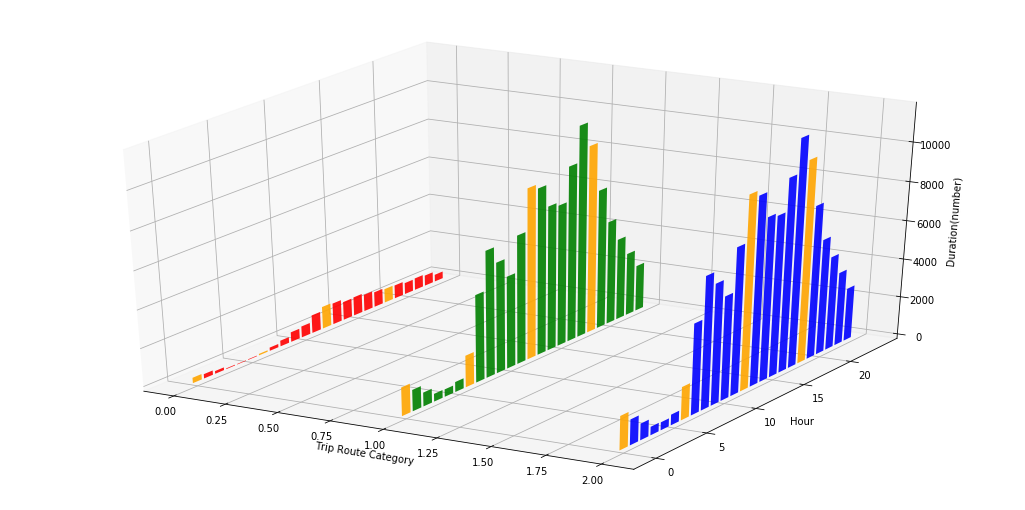

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111,projection='3d')
for c, z in zip(['r', 'g', 'b'], [0,1,2]):
    if(z == 0):
        xs = range(24)
        ys = dat0[dat0["Trip Route Category"]=="Round Trip"].groupby("Hour")["Duration"].count()
    elif(z ==1):
        xs = range(24)
        ys = dat0[dat0["Trip Route Category"]=="One Way"].groupby("Hour")["Duration"].count()
    else:
        xs = range(24)
        ys = dat0.groupby("Hour")["Duration"].count()
    cs = [c]  * 6
    cs[0] = 'orange'
    ax.bar(xs, ys, zs=z, zdir='x', color=cs, alpha=0.9)
ax.set_xlabel('Trip Route Category')
ax.set_ylabel('Hour')
ax.set_zlabel('Duration(number)')

plt.show()

На картинке можно наблюдать, что:
* Общее число поездок имеет ярковыраженное распределение, с пиками в 8, 12-13, 16-18 часах
* Для "круговых" велосипедестов распределение более гладкое (пользователи менее заботяться о соблюдении четкого расписания).
***

Средняя продолжительность поездки (красный - круговой маршрут, зеленый - в одну сторону, синий - общий):

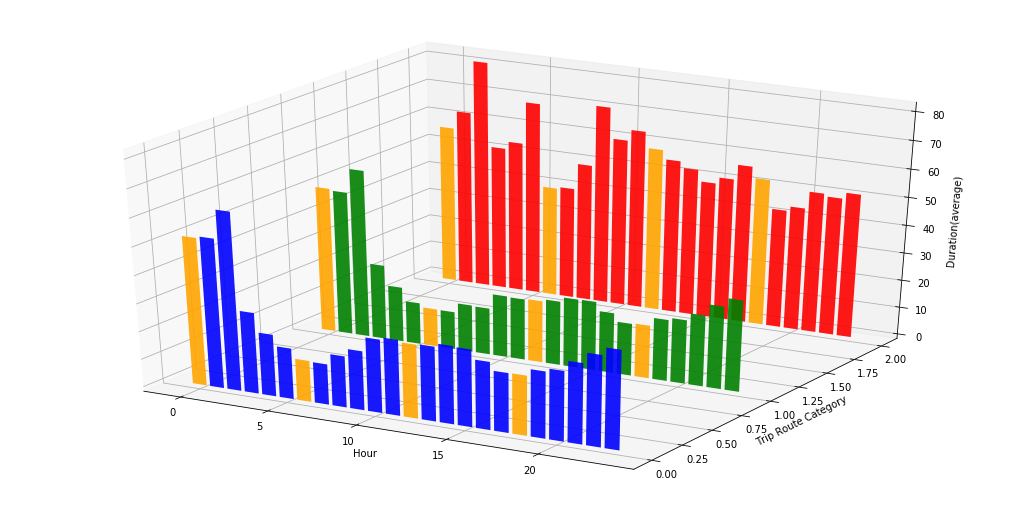

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111,projection='3d')
for c, z, m in zip(['b', 'g', 'r'], [0,1,2],[7,8,9,10]):
    if(z == 2):
        xs = range(24)
        ys = dat0[dat0["Trip Route Category"]=="Round Trip"].groupby("Hour")["Duration"].mean()
    elif(z ==1):
        xs = range(24)
        ys = dat0[dat0["Trip Route Category"]=="One Way"].groupby("Hour")["Duration"].mean()
    else:
        xs = range(24)
        ys = dat0.groupby("Hour")["Duration"].mean()
    cs = [c]  * 6
    cs[0] = 'orange'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.9)
ax.set_xlabel('Hour')
ax.set_ylabel('Trip Route Category')
ax.set_zlabel('Duration(average)')

plt.show()

По графикам выше можно сделать выводы:
* Средняя продолжительноть поездки мала в 6-7 и 17-18, но высока при 10-15. Этот факт косвенно подтвержает гипотезу (предложенную в п.Интерпретация): утром и вечером поездки короткие, так как люди добираются до учебы/работы, в то время как днем поездки более продолжительны, вероятно у человека выходной/много свободного времени что позволяет ему дольше ездить.
* "Круговая" поезда более длительна: такой тип выбирают люди с более свободным расписанием и большим количеством времени, вероятнее всего они на отдыхе или у них выходной
* Имеется аномалия в 2 часах: наблюдаются любители длительных ночных поездок.
***

### **3. Номер Велосипеда**
Отсортируем велосипеды по популярности, вычислим среднии длительности

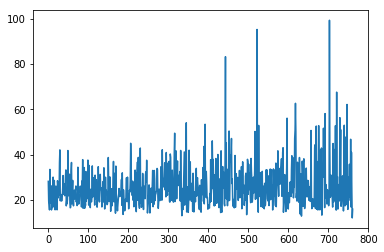

In [13]:
import collections as cs
c = cs.Counter()
for bike in dat0["Bike ID"]:
    c[bike]+=1
d=c.most_common(len(c))
f=np.arange(len(c))
f=np.float64(f)
for bike in dat0["Bike ID"]:
    c[bike] += 1
d=c.most_common(len(c))
for i in range (len(c)):
    f[i]=dat0[dat0["Bike ID"]==d[i][0]]["Duration"].mean()
plt.plot(range(762),f)

Для лучшей наглядности, сгруппируем по 50:

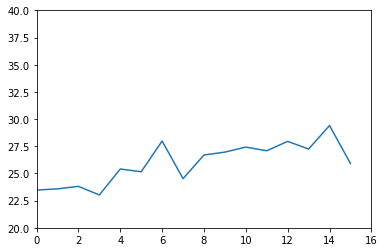

In [14]:
aw=np.arange(16)
aw=np.float32(aw)
for q in range(16):
    aw[q]=f[50*q:50*(q+1)].mean()
plt.axis([0,16,20,40])
plt.plot(range(16),aw)

Довольно сложно судить о средней длительности поездки основываясь только на номере велосипеда (это не самая стабильная переменная), но в целом, продолжительность поездки растет с уменьшением популярности байка .

### **4. День**
В подтверждении гипотезы в пункте "Интерпретация", невооруженным глазом видно, что у графиков есть 4-5 равноудаленных пика, которые, как оказывается, приходятся на выходные месяца. И наоборот, спады средней продолжительности поездки приходятся на будние дни.

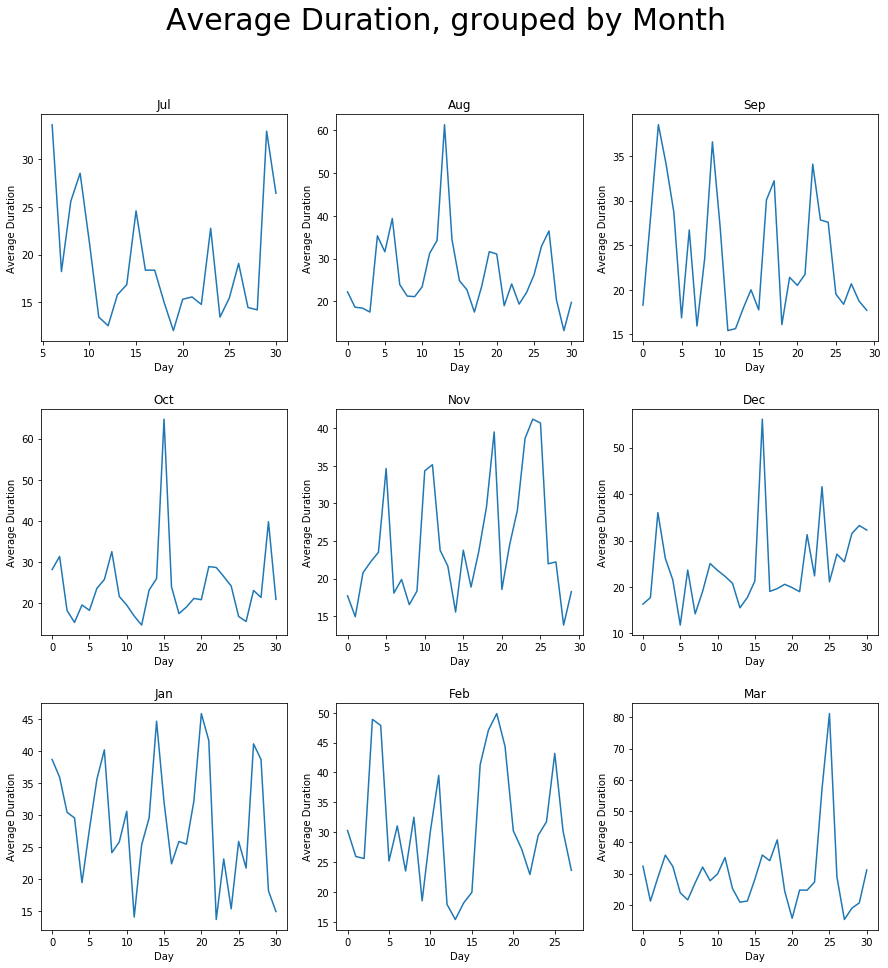

In [15]:
month = ["Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar"]
day = [6,0,0,0,0,0,0,0,0,0]
f, axarr = plt.subplots(3,3, figsize=(15,15))
f.suptitle('Average Duration, grouped by Month',size=30)
for i,j in zip([0,0,0,1,1,1,2,2,2],[0,1,2]*3):
    x=np.arange(day[i+j],day[i+j]+len(dat0[dat0["Month"]==3*i+j+7].groupby("Day")))
    y=dat0[dat0["Month"]==3*i+j+7].groupby("Day")["Duration"].mean()
    axarr[i,j].plot(x, y)
    axarr[i,j].set_title(month[3*i+j])
f.subplots_adjust(hspace=0.3)
for ax in axarr.flat:
    ax.set(xlabel='Day', ylabel='Average Duration')


# Вывод

Данный подход может использоваться для сервисов а-ля Google Maps (конечно же с доработкой) для оценки продолжительности поездки, чтобы пользователи могли рассчитывать время затраченное в пути.

В дальнейшем необходимо увеличить точность предсказания, 72% это неплохо, но хотелось бы больше. Переменные "Номер велосипеда", "День" и "Месяц" являются значимыми, на вряд ли могут использоваться в качестве предикторов напрямую. Для создания более точной и реальной модели обоснованно потребовать наличие переменных, влияющих на продолжительность ближайший поездок, такие как: погодные условия (дождь/снег, температура, видимость, влажность, скорость ветра), состояние трафика (загруженность на дорогах, час пики, наличие велосипедов на станциях) и другие.
